# K Nearest Neighbors (KNN)

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

## Dataset

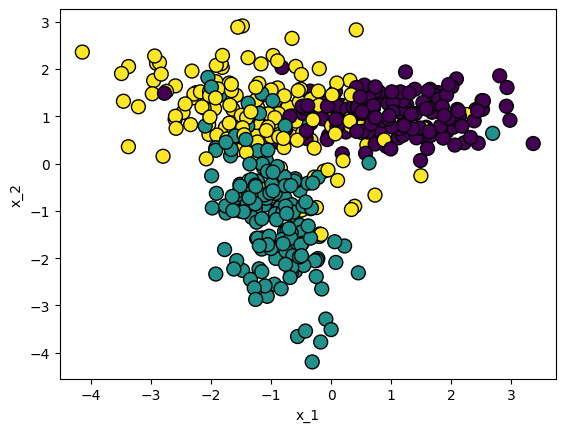

In [12]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=3,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()

In [13]:
# Training/Testing Dataset 분리 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

print("Training samples: ", len(X_train))
print("Testing samples: ", len(X_test))

Training samples:  400
Testing samples:  100


## Model


In [14]:
def L2_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
  def __init__(self, k=3):
    # initialization
    self.k = k

  def fit(self, X, y):
    # Storage training datas
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    # Prediction
    y_pred = []

    for X_i in X :
      distance = [L2_distance(X_i, X_train_i) for X_train_i in self.X_train]
      k_idx = np.argsort(distance) [:self.k]
      k_labels = [self.y_train[i] for i in k_idx]
      most_class = max(k_labels, key = k_labels.count)
      y_pred.append(most_class)

    return y_pred

## Prediction

In [15]:
model = KNN()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print(accuracy)

0.81


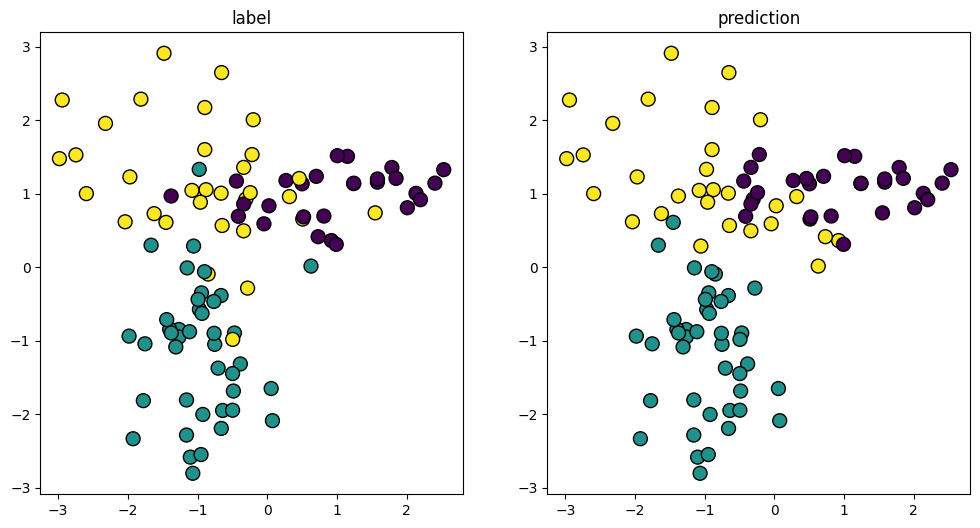

In [16]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("label")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c = y_test, s=100, edgecolor="k", linewidth=1)

plt.subplot(1,2,2)
plt.title("prediction")
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c = y_pred, s=100, edgecolor="k", linewidth=1)
plt.show()

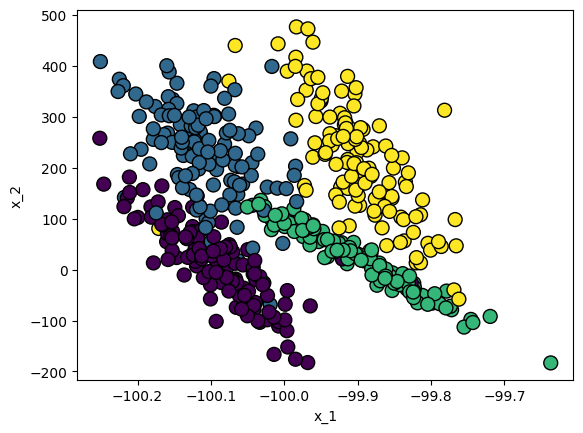

In [17]:
X, y = make_classification(n_samples=500,
                           n_features=2,
                           n_classes=4,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=40)

X[:, 0] = X[:, 0] * 0.1 - 100
X[:, 1] = X[:, 1] * 100 + 120

plt.scatter(X[:, 0], X[:, 1], marker = 'o', c=y, s=100, edgecolor="k", linewidth=1)
plt.xlabel("x_1")
plt.ylabel("x_2")
plt.show()